# Machine Learning Tutorial Python - 18: K nearest neighbors classification with python code

- K nearest neighbor counts number of closest data points and classifies with whichever group has the most.


In [116]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [117]:
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df["target"] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [118]:
df.target = df.target.map(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


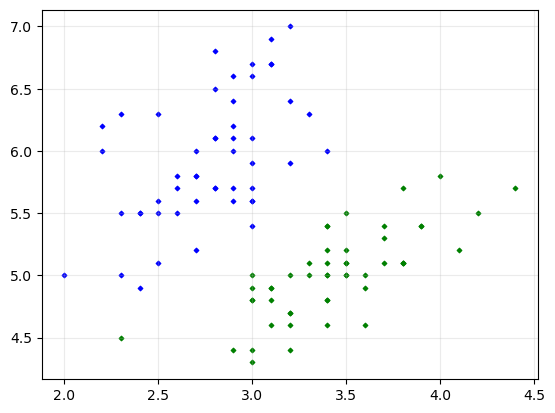

In [119]:
import matplotlib.pyplot as plt

size = 5
mark = "D"

plt.scatter(
    df.loc[df.target == "setosa"]["sepal width (cm)"],
    df.loc[df.target == "setosa"]["sepal length (cm)"],
    c="g",
    marker=mark,
    s=size,
)
plt.scatter(
    df.loc[df.target == "versicolor"]["sepal width (cm)"],
    df.loc[df.target == "versicolor"]["sepal length (cm)"],
    c="b",
    marker=mark,
    s=size,
)
# plt.scatter(
#     df.loc[df.target == "virginica"]["sepal width (cm)"],
#     df.loc[df.target == "virginica"]["sepal length (cm)"],
#     c="r",
#     marker=mark,
#     s=size,
# )
plt.grid(alpha=0.25)

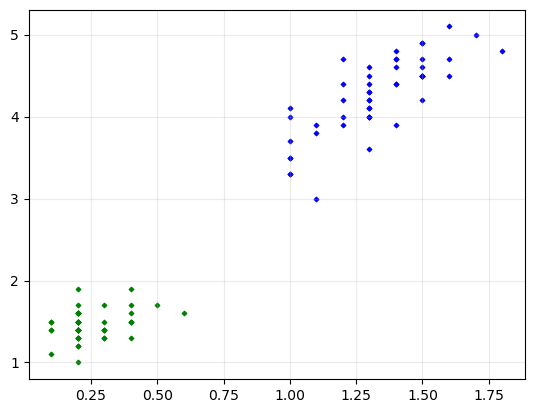

In [120]:
size = 5
mark = "D"

plt.scatter(
    df.loc[df.target == "setosa"]["petal width (cm)"],
    df.loc[df.target == "setosa"]["petal length (cm)"],
    c="g",
    marker=mark,
    s=size,
)
plt.scatter(
    df.loc[df.target == "versicolor"]["petal width (cm)"],
    df.loc[df.target == "versicolor"]["petal length (cm)"],
    c="b",
    marker=mark,
    s=size,
)
# plt.scatter(
#     df.loc[df.target == "virginica"]["petal width (cm)"],
#     df.loc[df.target == "virginica"]["petal length (cm)"],
#     c="r",
#     marker=mark,
#     s=size,
# )
plt.grid(alpha=0.25)

In [121]:
# split flower data
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [ ]:
X = df.drop(["target"], axis="columns")
y = df.target

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier(n_neighbors=3) # "k=3"
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9666666666666667

Text(58.222222222222214, 0.5, 'Truth')

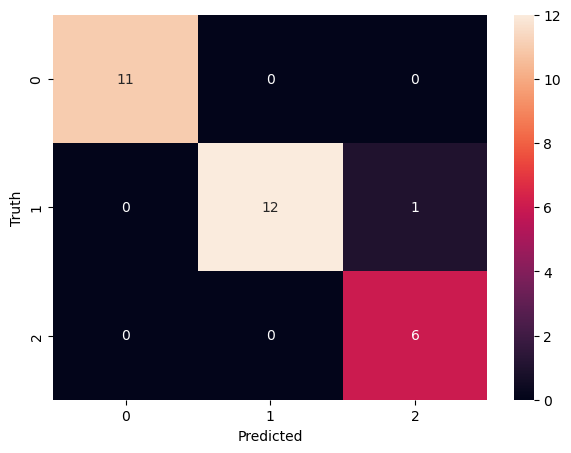

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(7, 5))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [129]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

